## **로지스틱회귀 알고리즘을 활용한 예측 학습**

#### **DataSet Upload**

In [ ]:
# 필요한 라이브러리 import 
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.impute import SimpleImputer
from sklearn.linear_model import LogisticRegression
from sklearn.preprocessing import StandardScaler
from google.colab import files

In [ ]:
# train 데이터와 test 데이터 로드 및 확인
train = pd.read_csv('https://ds-lecture-data.s3.ap-northeast-2.amazonaws.com/titanic/train.csv')
test = pd.read_csv('https://ds-lecture-data.s3.ap-northeast-2.amazonaws.com/titanic/test.csv')

print('Test 데이터에 존재하지 않는 Feature : ',train.columns.difference(test.columns)[0])

Test 데이터에 존재하지 않는 Feature :  Survived


In [ ]:
# 학습 위한 Validation 데이터셋 설정
X_train, X_val, y_train, y_val = train_test_split(train.drop(['Survived'],axis=1),train['Survived'], test_size=0.3)
for i in X_train, X_val, y_train, y_val: i.reset_index(drop=True, inplace=True)

/usr/local/lib/python3.6/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


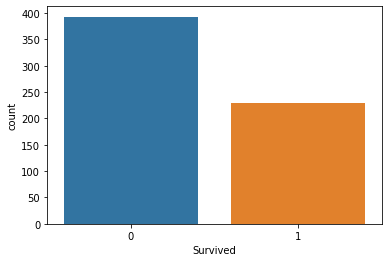

In [ ]:
#  y_train의 데이터 비율 확인
y_train.value_counts()
sns.countplot(y_train);

#### **Preprocessing - (1) 순차적 진행**

In [ ]:
# 정보 확인 후 순차적 전처리 진행
X_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 623 entries, 0 to 622
Data columns (total 11 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  623 non-null    int64  
 1   Pclass       623 non-null    int64  
 2   Name         623 non-null    object 
 3   Sex          623 non-null    object 
 4   Age          493 non-null    float64
 5   SibSp        623 non-null    int64  
 6   Parch        623 non-null    int64  
 7   Ticket       623 non-null    object 
 8   Fare         623 non-null    float64
 9   Cabin        143 non-null    object 
 10  Embarked     622 non-null    object 
dtypes: float64(2), int64(4), object(5)
memory usage: 53.7+ KB


In [ ]:
# (1) PassengerId - 필요 없는 속성 삭제
X_train.drop(['PassengerId'], inplace=True, axis=1)

In [ ]:
# (2) Name - 필요 없는 속성 삭제
X_train.drop(['Name'], inplace=True, axis=1)

In [ ]:
# (3) Ticket - 필요 없는 속성 삭제
X_train.drop(['Ticket'], inplace=True, axis=1)

In [ ]:
# (4) Cabin - 값이 너무 다양하여, 알파벳으로 대분류
print(X_train['Cabin'].unique())
X_train['Cabin']=X_train['Cabin'].str[:1]

['E8' nan 'E49' 'C111' 'D7' 'C68' 'C93' 'B51 B53 B55' 'B96 B98' 'A36'
 'C23 C25 C27' 'F33' 'D46' 'E101' 'C65' 'C22 C26' 'G6' 'B5' 'B49' 'C92'
 'B35' 'B22' 'B101' 'D19' 'C62 C64' 'D50' 'C148' 'B80' 'E33' 'A24' 'A19'
 'A23' 'D20' 'D' 'B30' 'B20' 'C49' 'F G73' 'B19' 'E121' 'C87' 'E50' 'E67'
 'E31' 'B42' 'C124' 'C99' 'F4' 'E38' 'E44' 'D35' 'D11' 'A32' 'B77' 'E58'
 'E25' 'B28' 'C106' 'D15' 'C47' 'D36' 'B39' 'D48' 'C125' 'B37' 'D9' 'B73'
 'F2' 'C78' 'C104' 'B58 B60' 'C86' 'C32' 'A31' 'T' 'C90' 'F G63' 'D33'
 'B82 B84' 'D17' 'E10' 'A7' 'A14' 'B50' 'B38' 'C50' 'D26' 'B69' 'C82'
 'B18' 'E12' 'D30' 'C30' 'B3' 'A6' 'C83' 'F38' 'C126' 'C91' 'C123' 'E24'
 'D49' 'E68' 'D56' 'C128' 'E46' 'E63' 'C52' 'C95' 'C2' 'E36' 'C70' 'B79'
 'B86' 'D21' 'A16' 'E34']


In [ ]:
# (5) Cabin & Sex - 원핫 인코딩
X_train = pd.get_dummies(X_train)
X_train.head(2)

,Pclass,Age,SibSp,Parch,Fare,Sex_female,Sex_male,Cabin_A,Cabin_B,Cabin_C,Cabin_D,Cabin_E,Cabin_F,Cabin_G,Cabin_T,Embarked_C,Embarked_Q,Embarked_S
0,1,33.0,1,0,53.100,1,0,0,0,0,0,1,0,0,0,0,0,1
1,3,15.0,0,0,7.225,1,0,0,0,0,0,0,0,0,0,1,0,0


In [ ]:
# (6) Age, Cabin - 평균값으로 결측치 대체
imputer = SimpleImputer()
X_train_impute = imputer.fit_transform(X_train)

In [ ]:
# (7) X_train 값 확인
X_train_impute_df = pd.DataFrame(X_train_impute,columns=X_train.columns)

print(X_train_impute_df.info())
print(X_train_impute_df.describe())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 623 entries, 0 to 622
Data columns (total 18 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   Pclass      623 non-null    float64
 1   Age         623 non-null    float64
 2   SibSp       623 non-null    float64
 3   Parch       623 non-null    float64
 4   Fare        623 non-null    float64
 5   Sex_female  623 non-null    float64
 6   Sex_male    623 non-null    float64
 7   Cabin_A     623 non-null    float64
 8   Cabin_B     623 non-null    float64
 9   Cabin_C     623 non-null    float64
 10  Cabin_D     623 non-null    float64
 11  Cabin_E     623 non-null    float64
 12  Cabin_F     623 non-null    float64
 13  Cabin_G     623 non-null    float64
 14  Cabin_T     623 non-null    float64
 15  Embarked_C  623 non-null    float64
 16  Embarked_Q  623 non-null    float64
 17  Embarked_S  623 non-null    float64
dtypes: float64(18)
memory usage: 87.7 KB
None
           Pclass         Ag

#### **Preprocessing - (2) 함수 생성**

In [ ]:
# train 데이터 로드
train = pd.read_csv('https://ds-lecture-data.s3.ap-northeast-2.amazonaws.com/titanic/train.csv')

In [ ]:
# 함수를 만들어 위 전처리를 프로세스화

def preprocessing(df):
  df.drop(['PassengerId', 'Name', 'Ticket'], inplace=True, axis=1)
  df['Cabin']=df['Cabin'].str[:1]
  df = pd.get_dummies(df)
  
  df_columns = pd.get_dummies(df).columns
  X_train, X_val, y_train, y_val = train_test_split(df.drop(['Survived'],axis=1),df['Survived'], test_size=0.3)

  imputer = SimpleImputer()
  X_train = imputer.fit_transform(X_train)
  X_val = imputer.transform(X_val)
  return X_train, X_val, y_train, y_val, df_columns

In [ ]:
X_train, X_val, y_train, y_val, train_columns = preprocessing(train)
X_val.shape, X_train.shape

((268, 18), (623, 18))

### **Modeling**

In [ ]:
# 로지스틱 회귀분석 활용해 모델링
lr = LogisticRegression()
lr.fit(X_train, y_train)

# 모델 정확도 Validation
print('정확도: ',lr.score(X_val,y_val).round(2))
print('Coef: ',lr.coef_.round(2),'\n\n')

정확도:  0.79
Coef:  [[-0.92 -0.03 -0.28 -0.15  0.    2.02 -0.6   0.43  0.33  0.37  0.6   0.61
   0.87 -0.1  -0.08  0.71  0.46  0.15]] 




/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/_logistic.py:940: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)


In [ ]:
# 각 범주에 속할 확률
lr.predict_proba(X_val)

array([[0.83180468, 0.16819532],
       [0.66205155, 0.33794845],
       [0.9166002 , 0.0833998 ],
       [0.13471173, 0.86528827],
       [0.37013928, 0.62986072],
       [0.07329476, 0.92670524],
       [0.39218739, 0.60781261],
       [0.81336488, 0.18663512],
       [0.60600922, 0.39399078],
       [0.86958113, 0.13041887],
       [0.74177133, 0.25822867],
       [0.89327017, 0.10672983],
       [0.46083907, 0.53916093],
       [0.04136991, 0.95863009],
       [0.22714459, 0.77285541],
       [0.90508014, 0.09491986],
       [0.23738382, 0.76261618],
       [0.39050277, 0.60949723],
       [0.09287655, 0.90712345],
       [0.92655044, 0.07344956],
       [0.91656575, 0.08343425],
       [0.39244867, 0.60755133],
       [0.8610688 , 0.1389312 ],
       [0.49812382, 0.50187618],
       [0.18675756, 0.81324244],
       [0.27360939, 0.72639061],
       [0.74052617, 0.25947383],
       [0.06842499, 0.93157501],
       [0.92338221, 0.07661779],
       [0.75358417, 0.24641583],
       [0.

### **알고리즘 성능 향상을 위한 표준화**

In [ ]:
# 표준화 진행 후 로지스틱 회귀모형 재학습
# (추가: Feature Engineering, 하이퍼 파라미터 튜닝 예정)

sd = StandardScaler()
X_train_scaled = sd.fit_transform(X_train)
X_val_scaled = sd.transform(X_val)

lr.fit(X_train_scaled, y_train)

print('정확도: ',lr.score(X_val_scaled,y_val).round(2))
print('Coef: ',lr.coef_.round(2),'\n\n')

정확도:  0.82
Coef:  [[-0.75 -0.4  -0.37 -0.15  0.14  0.68 -0.68  0.09  0.11  0.12  0.16  0.17
   0.24 -0.04 -0.16 -0.01 -0.06 -0.24]] 




### **최종 Test 데이터 학습**

In [ ]:
# test 데이터 로드
test = pd.read_csv('https://ds-lecture-data.s3.ap-northeast-2.amazonaws.com/titanic/test.csv')

In [ ]:
# Test 데이터 형식을 맞춰주기 위한 preprocessing 함수

def preprocessing_test(df):
  data = df.drop(['PassengerId', 'Name', 'Ticket'], axis=1)
  data['Cabin']=df['Cabin'].str[:1]
  data = pd.get_dummies(data)
  df_columns = data.columns

  imputer = SimpleImputer()
  data = imputer.fit_transform(data)

  return data, df_columns

X_test, test_columns = preprocessing_test(test)

In [ ]:
# column 확인 및 조정

print(X_test.shape,X_train.shape)
train_columns.difference(test_columns)

(418, 17) (623, 18)


Index(['Cabin_T', 'Survived'], dtype='object')

In [ ]:
# 모델 학습 후 Submission 파일 생성

# Validation 데이터와 Train 데이터를 모두 학습해야 하므로, Data Set 설정
X_train_total = np.concatenate((X_train_scaled,X_val_scaled),axis=0)
X_train_total = np.delete(X_train_total,15,axis=1) # 'Cabin_T' 삭제
y_train_total = pd.concat([y_val,y_train]).reset_index(drop=True)

# 모델 학습
lr.fit(X_train_total,y_train_total)
pred = lr.predict(X_test)

# Submission 파일 생성
submission = test[['PassengerId']].copy()
submission['Pred'] = pred
submission.head(3)

,PassengerId,Pred
0,892,1
1,893,1
2,894,1


In [ ]:
# Submission 파일 export
submission.to_csv('Submission_Titanic.csv')
files.download('Submission_Titanic.csv')

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>